In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np

import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('data/pieman_data/sub-001-task-intact1.nii')

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s',
                            datefmt='%m/%d/%Y %H:%M:%S',
                            level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files, num_factors=15)

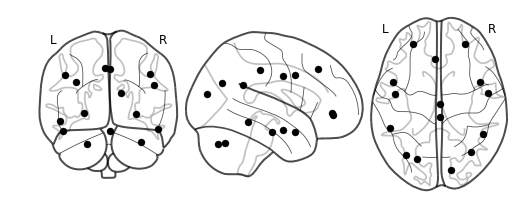

In [6]:
htfa.plot_factor_centers()

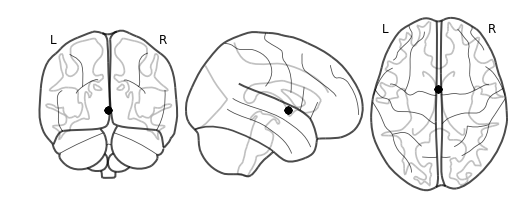

In [7]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(s)

In [8]:
prior_sample = htfa.sample()

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

del prior_sample

03/24/2018 16:08:25 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.34362549e+03


In [9]:
losses = htfa.train(num_steps=1000, learning_rate=1e-1, log_level=logging.INFO, num_particles=1)

03/24/2018 16:08:27 [Epoch 1] (170ms) Posterior free-energy 1.37720704e+09
03/24/2018 16:08:27 [Epoch 2] (60ms) Posterior free-energy 1.37469824e+09
03/24/2018 16:08:27 [Epoch 3] (58ms) Posterior free-energy 1.37545843e+09
03/24/2018 16:08:27 [Epoch 4] (57ms) Posterior free-energy 1.37484480e+09
03/24/2018 16:08:27 [Epoch 5] (56ms) Posterior free-energy 1.37791552e+09
03/24/2018 16:08:27 [Epoch 6] (54ms) Posterior free-energy 1.39536525e+09
03/24/2018 16:08:27 [Epoch 7] (55ms) Posterior free-energy 1.37469248e+09
03/24/2018 16:08:27 [Epoch 8] (56ms) Posterior free-energy 1.37484979e+09
03/24/2018 16:08:28 [Epoch 9] (58ms) Posterior free-energy 1.37477235e+09
03/24/2018 16:08:28 [Epoch 10] (58ms) Posterior free-energy 1.37454490e+09
03/24/2018 16:08:28 [Epoch 11] (59ms) Posterior free-energy 1.37572262e+09
03/24/2018 16:08:28 [Epoch 12] (63ms) Posterior free-energy 1.37499866e+09
03/24/2018 16:08:28 [Epoch 13] (59ms) Posterior free-energy 1.37448870e+09
03/24/2018 16:08:28 [Epoch 14] (6

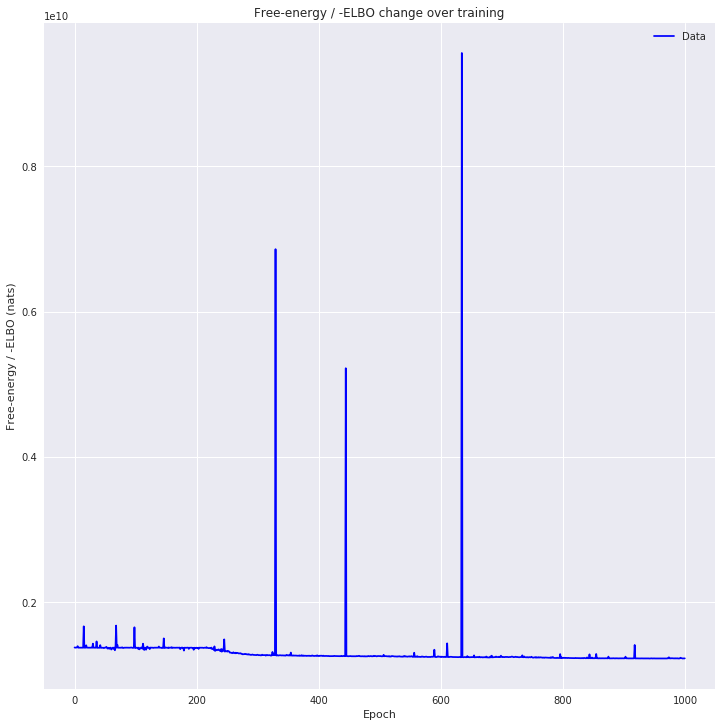

In [10]:
utils.plot_losses(losses)

In [11]:
posterior_sample = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

03/24/2018 16:09:27 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.05748926e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x15x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x15x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x15]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x15]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x15]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x15]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x15]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x15]), 'voxel_noise': Normal([torch.FloatTensor of size 1x1]), 'subject_params_mu': Normal([torch.FloatTensor of size 1x1x15]), 'subject_params_sigma': Normal([torch.FloatTensor of size 1x1x15]), 'Weights0': Normal([torch.FloatTensor of size 1x300x15]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x15x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x15]), 'Y0': Normal([torch.Flo

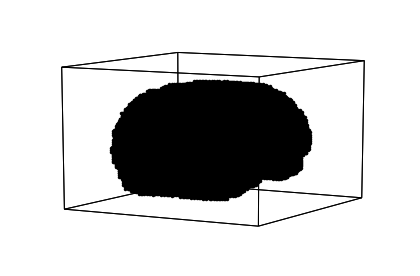

In [12]:
htfa.plot_voxels()

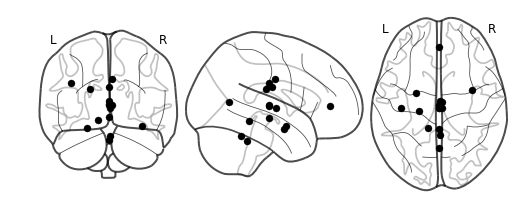

In [13]:
htfa.plot_factor_centers()

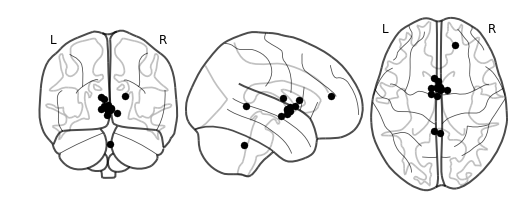

In [14]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(s)